# 🏠 House Price Prediction System using Machine Learning

### A Machine Learning project to predict house prices based on features available in dataset.

## Import Libraries

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [510]:
df=pd.read_csv("train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## EDA

In [511]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [512]:
df.shape

(29451, 12)

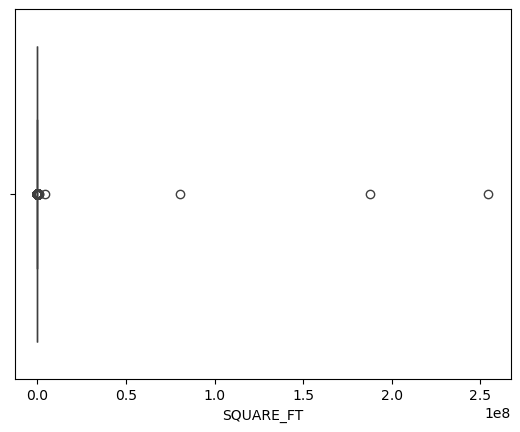

In [513]:
plt.figure()
sns.boxplot(x=df["SQUARE_FT"])
plt.show()

In [514]:
df = df[(df["SQUARE_FT"] >= 200) & (df["SQUARE_FT"] <= 10000)]

In [515]:
df["SQUARE_FT"].describe()

count    29222.000000
mean      1310.436216
std        726.712914
min        200.000000
25%        900.005803
50%       1171.623284
75%       1546.391753
max      10000.000000
Name: SQUARE_FT, dtype: float64

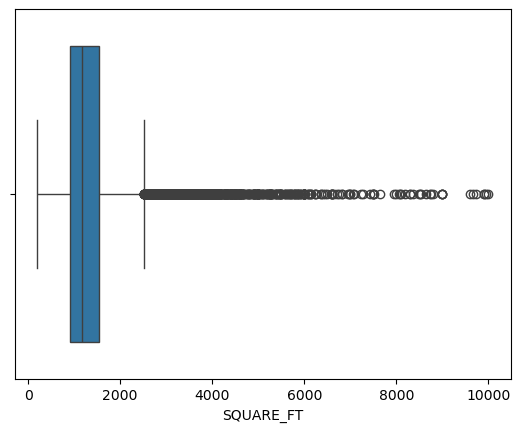

In [516]:
plt.figure()
sns.boxplot(x=df["SQUARE_FT"])
plt.show()

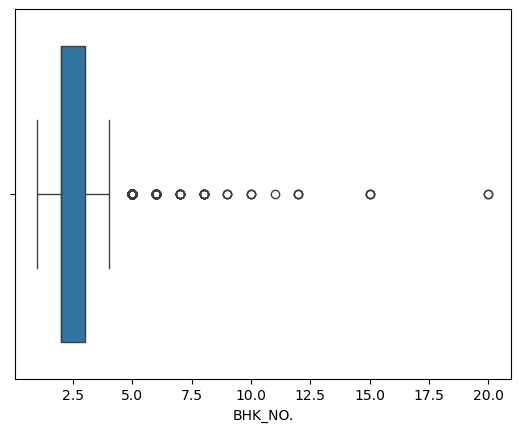

In [517]:
plt.figure()
sns.boxplot(x=df["BHK_NO."])
plt.show()

In [518]:
df = df[(df["BHK_NO."] >= 1) & (df["BHK_NO."] <= 7)]


In [519]:
df["BHK_NO."].describe()

count    29197.000000
mean         2.381169
std          0.812185
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: BHK_NO., dtype: float64

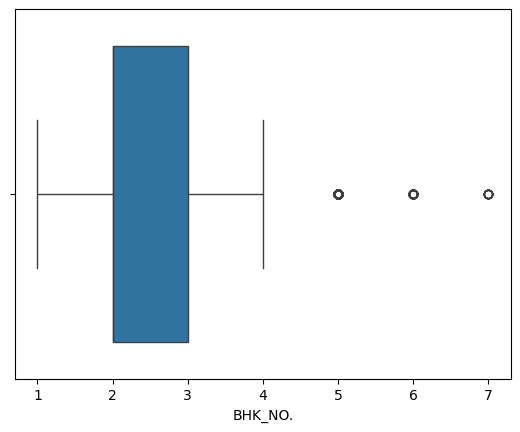

In [520]:
plt.figure()
sns.boxplot(x=df["BHK_NO."])
plt.show()

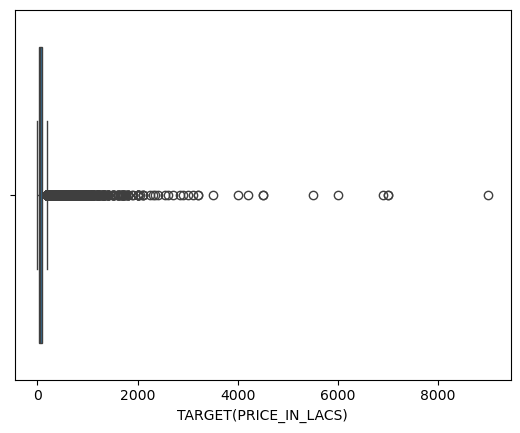

In [521]:
plt.figure()
sns.boxplot(x=df["TARGET(PRICE_IN_LACS)"])
plt.show()

In [522]:
df = df[(df["TARGET(PRICE_IN_LACS)"] >= 5) & (df["TARGET(PRICE_IN_LACS)"] <= 5000)]

In [523]:
df["TARGET(PRICE_IN_LACS)"].describe()

count    29172.000000
mean       100.405529
std        157.611511
min          5.000000
25%         38.000000
50%         61.200000
75%        100.000000
max       4500.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

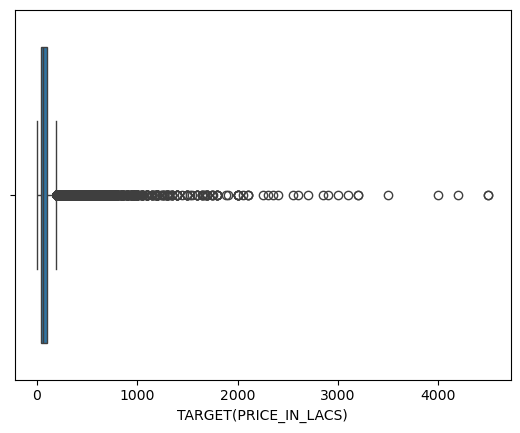

In [524]:
plt.figure()
sns.boxplot(x=df["TARGET(PRICE_IN_LACS)"])
plt.show()

In [525]:
df.rename(columns={
    "LATITUDE": "LONG_TMP",
    "LONGITUDE": "LAT_TMP"
}, inplace=True)

df.rename(columns={
    "LAT_TMP": "LATITUDE",
    "LONG_TMP": "LONGITUDE"
}, inplace=True)

In [526]:
df[["LATITUDE","LONGITUDE"]].describe()

,LATITUDE,LONGITUDE
count,29172.000000,29172.000000
mean,21.304823,76.837774
std,6.206450,10.602562
min,-37.713008,-121.761248
25%,18.452663,73.798100
50%,20.786784,77.324966
75%,26.900926,77.810954
max,59.912884,152.962676


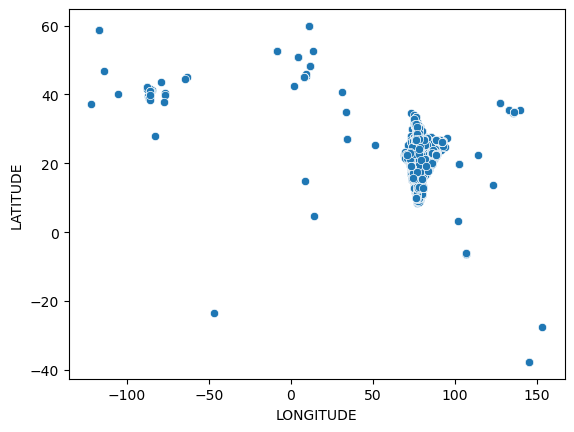

In [527]:
plt.figure()
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"])
plt.show()

In [528]:
df = df[
    (df["LATITUDE"] >= 6) & (df["LATITUDE"] <= 37) &
    (df["LONGITUDE"] >= 68) & (df["LONGITUDE"] <= 98)
]
print("After cleaning shape:", df.shape)

After cleaning shape: (28914, 12)


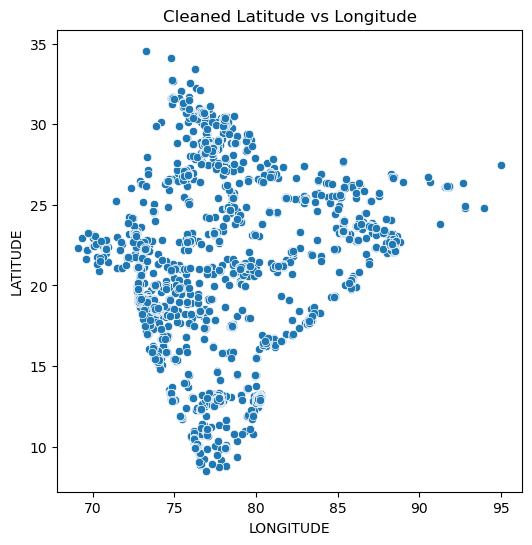

In [529]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"])
plt.title("Cleaned Latitude vs Longitude")
plt.show()

In [530]:
df["PRICE_PER_SQFT"] = (df["TARGET(PRICE_IN_LACS)"] * 100000) / df["SQUARE_FT"]

In [531]:
df["PRICE_PER_SQFT"].describe()

count     28914.000000
mean       7367.355226
std        7962.418230
min         155.000000
25%        3548.000001
50%        5080.500000
75%        8024.000001
max      466666.000008
Name: PRICE_PER_SQFT, dtype: float64

In [532]:
df = df[
    (df["PRICE_PER_SQFT"] >= 1000) &
    (df["PRICE_PER_SQFT"] <= 100000)
]

print("After PPSF cleaning:", df.shape)

After PPSF cleaning: (28865, 13)


In [533]:
df["PRICE_PER_SQFT"].describe()

count     28865.000000
mean       7323.985103
std        7017.310959
min        1033.000000
25%        3555.000000
50%        5087.000000
75%        8027.000001
max      100000.000000
Name: PRICE_PER_SQFT, dtype: float64

In [534]:
print(df.shape)

(28865, 13)


## Location Clustering

In [535]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=25, random_state=42, batch_size=2048)
df["LOC_CLUSTER"] = kmeans.fit_predict(df[["LATITUDE","LONGITUDE"]])

In [536]:
df["LOC_CLUSTER"].value_counts()


LOC_CLUSTER
2     4946
0     4156
21    3424
20    2118
4     1821
3     1773
11    1253
9     1246
1     1246
10    1216
5     1115
8      646
13     549
14     547
6      522
12     452
15     338
16     273
19     216
7      202
24     192
22     187
23     175
17     147
18     105
Name: count, dtype: int64

In [537]:
df["LAT_BIN"] = (df["LATITUDE"] * 4).round() / 4
df["LON_BIN"] = (df["LONGITUDE"] * 4).round() / 4
df["SQFT_PER_BHK"] = df["SQUARE_FT"] / df["BHK_NO."]

In [538]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),PRICE_PER_SQFT,LOC_CLUSTER,LAT_BIN,LON_BIN,SQFT_PER_BHK
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,4229.999999,0,13.00,77.50,650.118204
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,4000.000000,0,12.25,76.75,637.500000
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,4608.000000,0,12.75,77.75,466.579861
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,6721.000000,21,28.75,77.25,464.960571
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,6056.000000,3,22.50,88.50,499.504623


In [539]:
df = df.drop(columns=["LATITUDE","LONGITUDE"])

In [540]:
df = df.drop(columns=["ADDRESS"], errors="ignore")

In [541]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'TARGET(PRICE_IN_LACS)',
       'PRICE_PER_SQFT', 'LOC_CLUSTER', 'LAT_BIN', 'LON_BIN', 'SQFT_PER_BHK'],
      dtype='object')

## Separate X and Y

In [542]:
pip install catboost

In [543]:
import numpy as np

y = np.log1p(df["TARGET(PRICE_IN_LACS)"])
X = df.drop(columns=["TARGET(PRICE_IN_LACS)", "PRICE_PER_SQFT"], errors="ignore")
X = X.drop(columns=["ADDRESS"], errors="ignore")

## Pre-Processing

In [544]:
cat_cols = X.select_dtypes(include="object").columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['POSTED_BY', 'BHK_OR_RK'], dtype='object')


In [545]:
cat_features = [X.columns.get_loc(col) for col in cat_cols]
print("Cat feature indices:", cat_features)

Cat feature indices: [0, 4]


## Train Test Split 

In [546]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Choosing Model

In [547]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=800,
    depth=10,
    learning_rate=0.05,
    loss_function="RMSE",
    eval_metric="RMSE",
    random_seed=42,
    verbose=100
)

## Train the Model

In [548]:
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	learn: 0.7852644	test: 0.7763831	best: 0.7763831 (0)	total: 81ms	remaining: 1m 4s
100:	learn: 0.3729890	test: 0.3884540	best: 0.3884540 (100)	total: 5.46s	remaining: 37.8s
200:	learn: 0.3539264	test: 0.3763102	best: 0.3763102 (200)	total: 10.2s	remaining: 30.3s
300:	learn: 0.3420605	test: 0.3699376	best: 0.3699376 (300)	total: 15.3s	remaining: 25.4s
400:	learn: 0.3324364	test: 0.3660896	best: 0.3660838 (399)	total: 22.3s	remaining: 22.2s
500:	learn: 0.3240594	test: 0.3636675	best: 0.3636675 (500)	total: 28.1s	remaining: 16.8s
600:	learn: 0.3167256	test: 0.3620881	best: 0.3620881 (600)	total: 34.3s	remaining: 11.3s
700:	learn: 0.3104390	test: 0.3614239	best: 0.3614221 (699)	total: 40.3s	remaining: 5.69s
799:	learn: 0.3050702	test: 0.3606746	best: 0.3606746 (799)	total: 46.3s	remaining: 0us

bestTest = 0.3606745664
bestIteration = 799



## Make Predicition

In [549]:
y_pred_log = pipe.predict(X_test)

In [550]:
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

In [551]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2:", r2_score(y_test_real, y_pred))
print("MAE:", mean_absolute_error(y_test_real, y_pred))

R2: 0.7132634511405931
MAE: 28.668047464427033


## Saving the model

In [552]:
import joblib
joblib.dump(pipe, "house_price_model.pkl")


['house_price_model.pkl']

## Load & Prediction

In [553]:
model = joblib.load("house_price_model.pkl")

In [554]:
def predict_price(input_df):
    pred_log = model.predict(input_df)
    return np.expm1(pred_log)

In [555]:
sample = X_test.iloc[[0]]
sample
predicted = predict_price(sample)
print("Predicted price (lakhs):", predicted[0])

Predicted price (lakhs): 92.211676594482


In [556]:
actual = np.expm1(y_test.iloc[0])
print("Actual price (lakhs):", actual)

Actual price (lakhs): 20.099999999999998


In [557]:
for i in range(10):
    sample = X_test.iloc[[i]]
    pred = predict_price(sample)[0]
    actual = np.expm1(y_test.iloc[i])
    print(f"Pred: {pred:.1f}  |  Actual: {actual:.1f}")

Pred: 92.2  |  Actual: 20.1
Pred: 23.1  |  Actual: 19.9
Pred: 47.5  |  Actual: 60.0
Pred: 36.5  |  Actual: 36.0
Pred: 107.3  |  Actual: 69.0
Pred: 104.6  |  Actual: 140.0
Pred: 50.5  |  Actual: 46.5
Pred: 168.6  |  Actual: 500.0
Pred: 62.3  |  Actual: 26.4
Pred: 79.9  |  Actual: 60.0


In [558]:
y_pred = predict_price(X_test)
y_true = np.expm1(y_test)

abs_err = np.abs(y_pred - y_true)

print("Mean Absolute Error:", abs_err.mean())
print("Median Absolute Error:", np.median(abs_err))


Mean Absolute Error: 28.668047464427033
Median Absolute Error: 11.680406079736002
